#LONDON HOUSES DATABASE - LINEAR REGRESSION

By Danilo Carrillo C.

In [ ]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving london_houses.csv to london_houses.csv


The real estate market needs to understand which characteristics truly influence a property's price to support investment, valuation, and risk assessment decisions. This project analyzes a dataset of properties in London to identify the main price drivers and build a statistically interpretable model for reliably estimating market values.

Unlike black-box approaches, this analysis prioritizes the validation of statistical assumptions and the interpretability of the model, allowing us to understand not only what the model predicts, but also why it does so.

##READ DATABASE
The objective is to use the "London Houses" database and make a price prediction using the most important variables as the database can be observed according to the fulfillment of the multiple linear regression assumptions

In [ ]:
df = pd.read_csv("london_houses.csv")
df.head()

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [ ]:
df.shape

(1000, 17)

##

##TRANSFORM DATABASE
Our Y variable is the price in £, to understand it better we´ll transform it as price/1000 to dont use big numbers.

We want to verify all the features in the linear regresion, if we have a quantity in our variables we´ll verify the use.

Also, we want to try and transform all the variables in number to compute another relations. Using dummy variables we can do that.

In [ ]:
#  Price / 1000
df['Price_k€'] = df['Price (£)'] / 1000

# dummy
cat_vars = [
    'Garden',
    'Garage',
    'Property Type',
    'Balcony',
    'Interior Style',
    'View',
    'Materials',
    'Building Status'
]

# dummy and price table
dummies = pd.get_dummies(df[cat_vars], drop_first=True)
df_final = pd.concat([df['Price_k€'], dummies], axis=1)


df_final['Age_bin'] = pd.cut(
    df['Building Age'],
    bins=[0, 10, 30, 60, 120],
    labels=['0–10', '10–30', '30–60', '60+']
)

df_final['Square Meters'] = df["Square Meters"]

df_final = pd.get_dummies(df_final, columns=['Age_bin'], drop_first=True)
df_final = df_final.astype(int)

# show
df_final.head()

,Price_k€,Garden_Yes,Garage_Yes,Property Type_Detached House,Property Type_Semi-Detached,Balcony_Low-level Balcony,Balcony_No Balcony,Interior Style_Industrial,Interior Style_Minimalist,Interior Style_Modern,...,View_Street,Materials_Laminate Flooring,Materials_Marble,Materials_Wood,Building Status_Old,Building Status_Renovated,Square Meters,Age_bin_10–30,Age_bin_30–60,Age_bin_60+
0,2291,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,179,0,0,1
1,1476,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,123,0,1,0
2,1881,0,1,0,1,0,1,1,0,0,...,1,0,0,1,0,1,168,0,1,0
3,1896,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,237,0,1,0
4,1524,0,1,0,1,0,1,0,0,1,...,0,0,0,1,1,0,127,1,0,0


## ASSUMPTION OF LINEAR REGRESSION

To do the assumption we need to think in a order, we need to verify the linearity and the multicolinearity, why these? because the independence of errors need the waste (the model doesn´t exist right now), the homocedasticity is the same situation, we need the model... and the normality of waste, it also does not exist before having waste.

we will do a scatterplot for linearity because we can know the real form of the relation (linear, curve, etc)

We can make graphs with age of the building and square meters, since the first has a large number of values it can be observed as if there were a relationship, while square meters is a continuous quantitative variable.

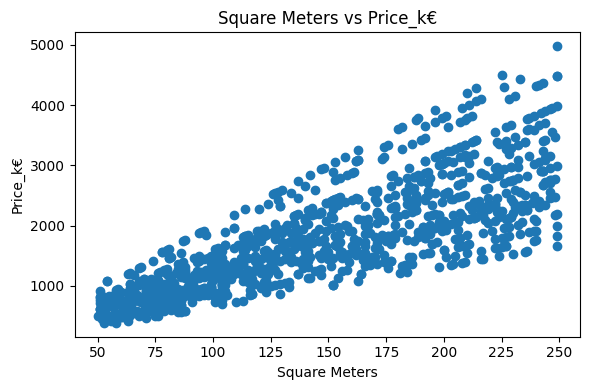

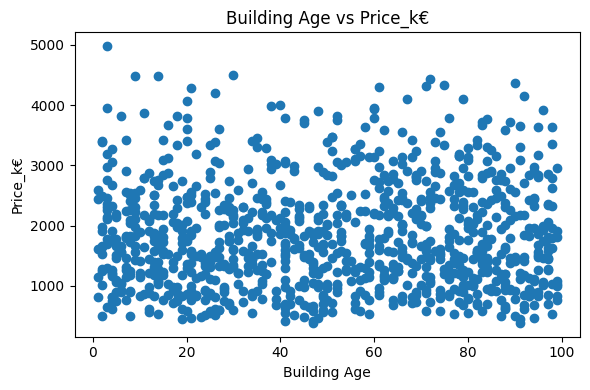

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# columns as int
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['Floors'] = df['Floors'].astype(int)

# list of numeric variables
numericas = ['Square Meters', 'Building Age']

for col in numericas:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df['Price_k€'])

    if col in ['Bedrooms', 'Bathrooms', 'Floors']:
        valores = sorted(df[col].unique())
        plt.xticks(valores)

    plt.title(f"{col} vs Price_k€")
    plt.xlabel(col)
    plt.ylabel("Price_k€")
    plt.tight_layout()
    plt.show()



In the case of discrete quantitative variables such as the number of floors, number of rooms, or the number of bathrooms, a scatter plot is not appropriate because the variable only takes a few integer values.
Scatter plots are designed for continuous variables, where the relationship can be visually interpreted as linear, curvilinear, etc.
For discrete variables, the points simply cluster into vertical stacks, which does not provide useful information about linearity.

If the price does not change significantly between levels (example: from 1 to 2 bathrooms), then the variable does not contribute meaningful information to a linear model.

In [ ]:
from scipy.stats import f_oneway
discretas = ['Bedrooms', 'Bathrooms', 'Floors']

for col in discretas:
    grupos = [df[df[col] == categoria]['Price_k€'] for categoria in sorted(df[col].unique())]

    # ANOVA
    stat, p = f_oneway(*grupos)

    print(f"Variable: {col}")
    print(f"F = {stat:.4f}")
    print(f"p-value = {p:.6f}")

    if p < 0.05:
        print("there is differences.\n")
    else:
        print("there isn´t differences.\n")

Variable: Bedrooms
F = 1.1544
p-value = 0.329515
there isn´t differences.

Variable: Bathrooms
F = 0.7480
p-value = 0.473556
there isn´t differences.

Variable: Floors
F = 1.0754
p-value = 0.341573
there isn´t differences.



Then, we shouldn´t use Bedrooms, Bathrooms and Floors in our linear regression model.

All the VIF values ​​obtained for the model variables are below 3, indicating no significant multicollinearity among the predictors.

In practical terms:

No variable linearly explains another.

The model coefficients will be stable.

The estimates will not be inflated.

The variance of the parameters will be adequate.

The inferences (p-values, confidence intervals) will be reliable.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df_final.drop(columns=['Price_k€'])

# VIF constant
X_const = sm.add_constant(X)

# Computing VIF
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

print(vif)

                        Variable        VIF
0                          const  34.593102
1                     Garden_Yes   1.026952
2                     Garage_Yes   1.026822
3   Property Type_Detached House   1.418109
4    Property Type_Semi-Detached   1.410044
5      Balcony_Low-level Balcony   1.358249
6             Balcony_No Balcony   1.360567
7      Interior Style_Industrial   1.498253
8      Interior Style_Minimalist   1.480455
9          Interior Style_Modern   1.490036
10                   View_Garden   1.667020
11                     View_Park   1.646947
12                      View_Sea   1.662790
13                   View_Street   1.601030
14   Materials_Laminate Flooring   1.582259
15              Materials_Marble   1.575655
16                Materials_Wood   1.613726
17           Building Status_Old   1.376870
18     Building Status_Renovated   1.366546
19                 Square Meters   1.027851
20                 Age_bin_10–30   2.411961
21                 Age_bin_30–60

##THE MODEL

The multiple linear regression model obtained demonstrates robust and stable performance in predicting housing prices. The adjusted R² in both the training set (0.741) and the test set (0.711) indicates that the model is able to explain a considerable proportion of the price variability, maintaining good generalizability without evidence of overfitting. Furthermore, the RMSE values ​​(approximately €438,000 in training and approximately €455,000 in test) show a reasonable prediction error within the real estate context, characterized by high price dispersion. The absence of significant multicollinearity among the predictor variables (VIF < 3) supports the model's stability. Overall, these results allow us to conclude that the model is suitable for analyzing and predicting housing prices in this dataset, effectively capturing the most relevant linear relationships between property characteristics and their market value.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# df_final contiene:
# - Price_k€
# - Square Meters
# - Age_bin dummies
# - all important dummy

# 1. x and y
X = df_final.drop(columns=['Price_k€'])
y = df_final['Price_k€']

# 2. 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 3. Create the model
model = LinearRegression()

# 4. training
model.fit(X_train, y_train)

# 5. predict
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 6. basics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# 7. R² aj
n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X_train.shape[1]

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

print("R² (train):", r2_train)
print("R² ajustado (train):", adj_r2_train)
print("R² (test):", r2_test)
print("R² ajustado (test):", adj_r2_test)
print("RMSE (train):", rmse_train)
print("RMSE (test):", rmse_test)


R² (train): 0.7485382570099255
R² ajustado (train): 0.7414183620990096
R² (test): 0.7426473385423369
R² ajustado (test): 0.710660002089972
RMSE (train): 438.3893781847593
RMSE (test): 455.33670328275474


he estimated coefficients from the multiple linear regression model provide insight into how each property characteristic affects the predicted price, holding all other variables constant.

The intercept is –329.26 k€, which serves as a mathematical baseline and does not have a direct real-world interpretation because no real property has all characteristics set to zero.

Among the predictors, property type has the strongest impact on price. Compared to the base category (Apartment), a Detached House increases the expected price by approximately 739.93 k€, while a Semi-Detached home increases it by 352.82 k€. Square meters also show a substantial positive effect: each additional square meter raises the predicted price by about 12.04 k€, confirming size as a key driver of property value.

Amenities such as a garden and a garage increase the price by 21.26 k€ and 13.95 k€, respectively. Some interior features also matter: a Modern style adds 41.29 k€, and a Minimalist style adds 20.28 k€, while an Industrial interior reduces price by 38.82 k€ relative to the baseline (Classic).

Balcony type influences value as well. Compared to the base category (High-level Balcony), having no balcony reduces the price by 46.93 k€, and a low-level balcony reduces it by 64.26 k€.
Similarly, properties with views other than the base category (likely "City") tend to be less valuable: Garden, Park, and Sea views all show negative coefficients of around –117 to –147 k€.

Building materials also exhibit clear differences: using Wood increases the expected price by 119.37 k€, Laminate Flooring by 77.75 k€, and Marble by 61.06 k€, compared to the baseline material.

Regarding building status, Old properties reduce the predicted price by 14.36 k€, and Renovated homes reduce it by 6.50 k€, relative to newly built properties.
Finally, building age has a varied effect: properties aged 10–30 years or 30–60 years add 19.51 k€ and 11.19 k€, respectively, while homes older than 60 years add 52.42 k€, suggesting that historic or premium older properties may command higher prices despite their age.

In [ ]:
# beta
intercept = model.intercept_

# beta_n
coefficients = model.coef_

# table with coef
coef_table = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficient (β)': coefficients
})

print("Intercept (β0):", intercept)
print(coef_table)


Intercept (β0): -329.2594963431734
                        Variable  Coeficient (β)
0                     Garden_Yes       21.261145
1                     Garage_Yes       13.949871
2   Property Type_Detached House      739.928196
3    Property Type_Semi-Detached      352.822518
4      Balcony_Low-level Balcony      -64.255458
5             Balcony_No Balcony      -46.932140
6      Interior Style_Industrial      -38.821702
7      Interior Style_Minimalist       20.277845
8          Interior Style_Modern       41.288712
9                    View_Garden     -146.954377
10                     View_Park     -116.527386
11                      View_Sea     -116.383869
12                   View_Street      -44.023430
13   Materials_Laminate Flooring       77.752606
14              Materials_Marble       61.061786
15                Materials_Wood      119.367926
16           Building Status_Old      -14.363790
17     Building Status_Renovated       -6.502994
18                 Square Meters  

The regression model predicts that the example house has an estimated market value of approximately €1,875,070. This prediction is obtained by applying the model’s intercept together with the individual contributions of each selected feature, such as the property being semi-detached, having 150 square meters, a garden, a garage, a modern interior style, a park view, wood materials, a renovated status, and an age between 10 and 30 years. Each of these characteristics increases or decreases the final estimate according to its corresponding regression coefficient. Overall, the predicted price reflects the combined influence of all these attributes based on the patterns learned from the dataset.

In [ ]:
example_house = pd.DataFrame({
    'Square Meters': [150],
    'Garden_Yes': [1],
    'Garage_Yes': [1],
    'Property Type_Detached House': [0],
    'Property Type_Semi-Detached': [1],
    'Balcony_Low-level Balcony': [0],
    'Balcony_No Balcony': [1],
    'Interior Style_Industrial': [0],
    'Interior Style_Minimalist': [0],
    'Interior Style_Modern': [1],
    'View_Garden': [0],
    'View_Park': [1],
    'View_Sea': [0],
    'View_Street': [0],
    'Materials_Laminate Flooring': [0],
    'Materials_Marble': [0],
    'Materials_Wood': [1],
    'Building Status_Old': [0],
    'Building Status_Renovated': [1],
    'Age_bin_10–30': [1],
    'Age_bin_30–60': [0],
    'Age_bin_60+': [0]
})

# Ensure the columns match the model exactly
example_house = example_house[X_train.columns]

# Predict price in k€
predicted_price_k = model.predict(example_house)[0]


print("Predicted Price (€):", predicted_price_k * 1000)

Predicted Price (€): 1875070.013551634


##INDEPENDENCE OF ERRORS

In the assumption of independence of errors we can observe that the value is close to 2.1, therefore, being within the range of 1.5 and 2.5 we conclude that there is no autocorrelation. We can see that the value is practically the ideal one, we can see that there is sufficient evidence that indicates that there is no positive and negative correlation.

In [ ]:
import numpy as np
from statsmodels.stats.stattools import durbin_watson

# Residuals on test set
residuals_test = y_test - y_pred_test

# Durbin-Watson statistic
dw_stat = durbin_watson(residuals_test)

print("Durbin-Watson statistic (test):", dw_stat)

Durbin-Watson statistic (test): 2.0669420601946014


##HOMOCEDASTICITY

In the assumption of homoscedasticity we can see that the null hypothesis is rejected, therefore we have constant variance errors, so there is heteroscedasticity. This does not affect the coefficients of β but may underestimate or overestimate the actual variability of our data.

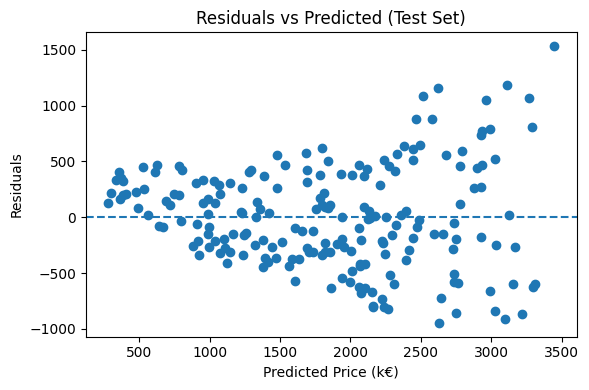

Breusch-Pagan LM stat: 54.480571130711986
Breusch-Pagan LM p-value: 0.00014071145308278927
Breusch-Pagan F stat: 3.012112966965159
Breusch-Pagan F p-value: 2.7880711854311748e-05


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# 1. Residuals vs Predicted (visual check)
plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals_test)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Predicted Price (k€)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Test Set)")
plt.tight_layout()
plt.show()

# 2. Breusch-Pagan test
#   exog = X variables with constant
X_test_const = sm.add_constant(X_test)

bp_test = het_breuschpagan(residuals_test, X_test_const)

bp_lm_stat = bp_test[0]
bp_lm_pvalue = bp_test[1]
bp_f_stat = bp_test[2]
bp_f_pvalue = bp_test[3]

print("Breusch-Pagan LM stat:", bp_lm_stat)
print("Breusch-Pagan LM p-value:", bp_lm_pvalue)
print("Breusch-Pagan F stat:", bp_f_stat)
print("Breusch-Pagan F p-value:", bp_f_pvalue)


##NORMALITY OF ERRORS

Regarding the normality assumption in the original model, the Shapiro–Wilk test does not reject the null hypothesis (p = 0.108), suggesting that the residuals are not significantly different from a normal distribution. However, the graphical analysis tells a different story. The Q–Q plot show strong deviations from the theoretical normal line, with heavy tails and a clear lack of alignment. This indicates that, despite the test result, the residuals are not normally distributed in practice. Therefore, the normality assumption is not adequately satisfied in this model.

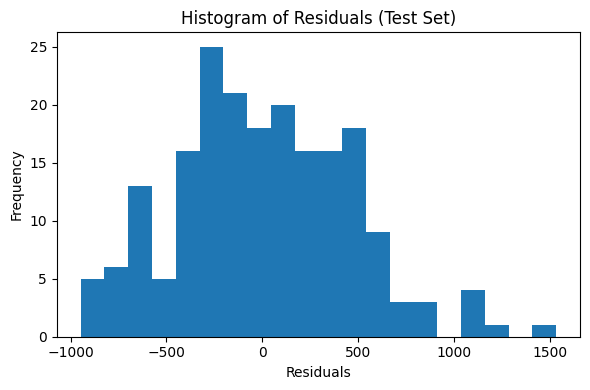

<Figure size 600x400 with 0 Axes>

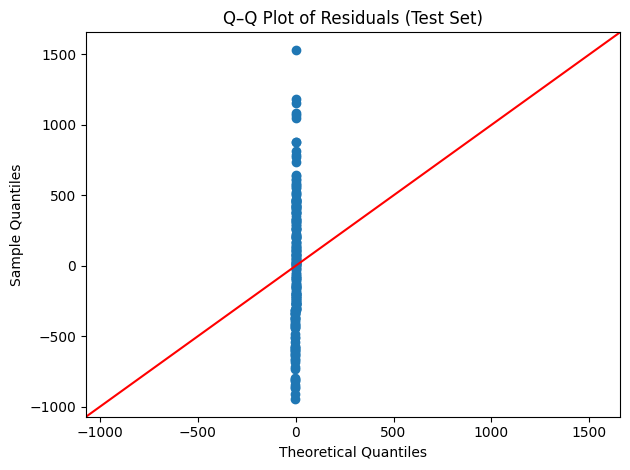

Shapiro-Wilk statistic: 0.9885257764039119
Shapiro-Wilk p-value: 0.10808084417228675


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# 1. Histogram of residuals
plt.figure(figsize=(6,4))
plt.hist(residuals_test, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Test Set)")
plt.tight_layout()
plt.show()

# 2. Q–Q plot
plt.figure(figsize=(6,4))
qqplot(residuals_test, line='45')
plt.title("Q–Q Plot of Residuals (Test Set)")
plt.tight_layout()
plt.show()

# 3. Shapiro–Wilk test for normality
shapiro_stat, shapiro_p = shapiro(residuals_test)

print("Shapiro-Wilk statistic:", shapiro_stat)
print("Shapiro-Wilk p-value:", shapiro_p)


##THE NEW MODEL (PRICE USING LOG)
We can make corrections (transformations) to avoid heteroscedasticity, in this case and due to the complexity it will be done by transforming the price with log. This helps us to reduce variance, stabilize tails, correct heteroskedasticity and improve normality

In [ ]:

# 1. log price
df_final['LogPrice'] = np.log(df_final['Price_k€'] * 1000)


# 2. x and y
X = df_final.drop(columns=['Price_k€', 'LogPrice'])
y = df_final['LogPrice']


# 3. 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 4. create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. predict in log
y_pred_train_log = model.predict(X_train)
y_pred_test_log = model.predict(X_test)


# 6. test the model
r2_train = r2_score(y_train, y_pred_train_log)
r2_test = r2_score(y_test, y_pred_test_log)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_log))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_log))


# 7. R² aju
n_train = X_train.shape[0]
n_test = X_test.shape[0]
p = X_train.shape[1]

adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p - 1)
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p - 1)

print("R² (train):", r2_train)
print("Adjusted R² (train):", adj_r2_train)
print("R² (test):", r2_test)
print("Adjusted R² (test):", adj_r2_test)
print("RMSE (train, log-scale):", rmse_train)
print("RMSE (test, log-scale):", rmse_test)


# 8. price
y_pred_train_eur = np.exp(y_pred_train_log)
y_pred_test_eur = np.exp(y_pred_test_log)

rmse_train_eur = np.sqrt(np.mean((np.exp(y_train) - y_pred_train_eur) ** 2))
rmse_test_eur = np.sqrt(np.mean((np.exp(y_test) - y_pred_test_eur) ** 2))

print("\nRMSE (train) en euros:", rmse_train_eur)
print("RMSE (test) en euros:", rmse_test_eur)

R² (train): 0.7864753644687681
Adjusted R² (train): 0.7804296218925942
R² (test): 0.7993959025611566
Adjusted R² (test): 0.7744620599416393
RMSE (train, log-scale): 0.23667541132005243
RMSE (test, log-scale): 0.23067139973360123

RMSE (train) en euros: 457444.4867141573
RMSE (test) en euros: 457430.45680584735


We can see how in the R2 and the adjusted R2 the model has learned better, besides in the test it has shown that it can also generalize, with the adjusted R2 something similar happens. we can say that the model predicts better. The RMSE looks low on the log scale, although it looks higher in euros now the training and testing have more similar values, this indicates that the model is more stable, consistent, and less prone to evefitting.

###Example with the new model

The log-linear regression model estimates how each housing characteristic influences the natural logarithm of the price, meaning each coefficient reflects an approximate percentage change rather than a direct change in euros. Positive coefficients—such as those for semi-detached and detached houses, modern interior style, wood materials, and square meters—indicate features that increase the expected price relative to their reference categories. Conversely, negative coefficients—such as low-level balconies, garden views, or properties aged 30 to 60 years—suggest features associated with lower prices. Using this model, the example house with 150 square meters, a garden, a garage, semi-detached structure, modern interior, park view, wood materials, renovated status, and an age between 10 and 30 years yields a predicted log-price of 14.3443, which corresponds to an estimated market value of approximately €1,696,794. This price reflects the combined multiplicative effects of all selected features in the log-linear model.

In [ ]:
import pandas as pd
import numpy as np

# 1) Intercept and coeficients
interceptlog = model.intercept_
coefficientslog = model.coef_

coef_table = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente (β)': coefficientslog
})

print("Intercepto (β0):", interceptlog)
print(coef_table)

# 2) example
example_house_log = pd.DataFrame({
    'Square Meters': [150],
    'Garden_Yes': [1],
    'Garage_Yes': [0],
    'Property Type_Detached House': [0],
    'Property Type_Semi-Detached': [1],
    'Balcony_Low-level Balcony': [0],
    'Balcony_No Balcony': [1],
    'Interior Style_Industrial': [0],
    'Interior Style_Minimalist': [0],
    'Interior Style_Modern': [1],
    'View_Garden': [0],
    'View_Park': [1],
    'View_Sea': [0],
    'View_Street': [0],
    'Materials_Laminate Flooring': [0],
    'Materials_Marble': [1],
    'Materials_Wood': [0],
    'Building Status_Old': [0],
    'Building Status_Renovated': [1],
    'Age_bin_10–30': [0],
    'Age_bin_30–60': [1],
    'Age_bin_60+': [0]
})

# 3) same model
example_house_log = example_house_log[X_train.columns]

# 4) predict in log
predicted_log_price = model.predict(example_house_log)[0]

# 5) euros
predicted_price_euros = np.exp(predicted_log_price)

print("Predicted log-price:", predicted_log_price)
print("Predicted price (€):", predicted_price_euros)


Intercepto (β0): 13.025204755866312
                        Variable  Coeficiente (β)
0                     Garden_Yes         0.009278
1                     Garage_Yes         0.006424
2   Property Type_Detached House         0.421533
3    Property Type_Semi-Detached         0.219532
4      Balcony_Low-level Balcony        -0.033415
5             Balcony_No Balcony        -0.013752
6      Interior Style_Industrial        -0.028450
7      Interior Style_Minimalist        -0.004580
8          Interior Style_Modern         0.021623
9                    View_Garden        -0.064795
10                     View_Park        -0.041328
11                      View_Sea        -0.053717
12                   View_Street        -0.032719
13   Materials_Laminate Flooring         0.022639
14              Materials_Marble        -0.011150
15                Materials_Wood         0.012000
16           Building Status_Old         0.004384
17     Building Status_Renovated         0.017524
18            

##NEW ASSUMPTIONS

In [ ]:
# Residual
residuals_train = y_train - y_pred_train_log
residuals_test  = y_test - y_pred_test_log

###INDEPENDENCE OF ERRORS

The error independence is still within an acceptable range, therefore there is no autocorrelation and an error independence can be concluded

In [ ]:
dw_stat_train = durbin_watson(residuals_train)
dw_stat_test = durbin_watson(residuals_test)
print("Durbin-Watson statistic (train):", dw_stat_train)
print("Durbin-Watson statistic (test):", dw_stat_test)

Durbin-Watson statistic (train): 1.8785979868160034
Durbin-Watson statistic (test): 1.779692245262653


###HOMOCEDASTICITY

The graph shows that the points behave like a cloud, so there are no visible patterns, we can see that the logarithmic transformation corrected the heteroskedasticity problem that had

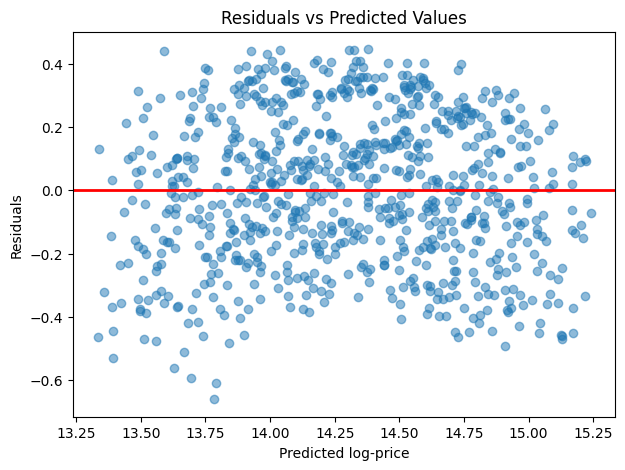

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_pred_train_log, residuals_train, alpha=0.5)
plt.axhline(0, color='red', linewidth=2)
plt.xlabel("Predicted log-price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

While the Breusch-Pagan test shows us that the hypothesis is not rejected, therefore the null hypothesis of Homoscedasticity is not rejected, the residuals have constant variance after the logarithm

In [ ]:
X_train_const = sm.add_constant(X_train)

bp_test = het_breuschpagan(residuals_train, X_train_const)

bp_labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
bp_results = dict(zip(bp_labels, bp_test))

print("Breusch-Pagan results:")
bp_lm_stat = bp_test[0]
bp_lm_pvalue = bp_test[1]
bp_f_stat = bp_test[2]
bp_f_pvalue = bp_test[3]

print("Breusch-Pagan LM stat:", bp_lm_stat)
print("Breusch-Pagan LM p-value:", bp_lm_pvalue)
print("Breusch-Pagan F stat:", bp_f_stat)
print("Breusch-Pagan F p-value:", bp_f_pvalue)


Breusch-Pagan results:
Breusch-Pagan LM stat: 22.855572655698264
Breusch-Pagan LM p-value: 0.40992305488352
Breusch-Pagan F stat: 1.0386965951375084
Breusch-Pagan F p-value: 0.4125145438042246


###NORMALITY OF ERROS

It can be seen that the histogram has a shape that appears to be symmetrical although the tails are loaded.

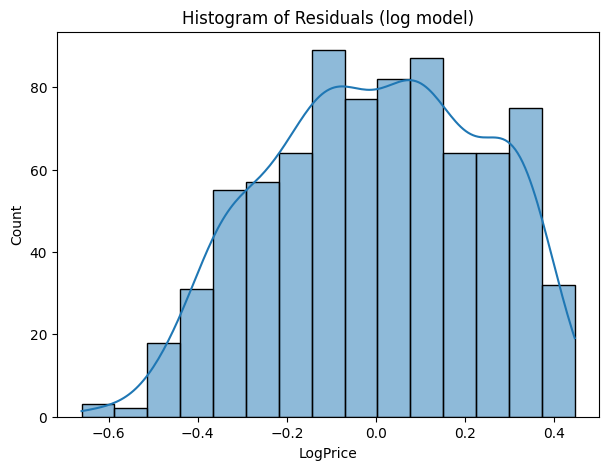

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(residuals_train, kde=True)
plt.title("Histogram of Residuals (log model)")
plt.show()


The QQ plot follows the red line, therefore the residuals can follow a normal distribution. There are some differences in the tails, but it can be considered normal with information on real estate, salary, or the economy, according to my research.

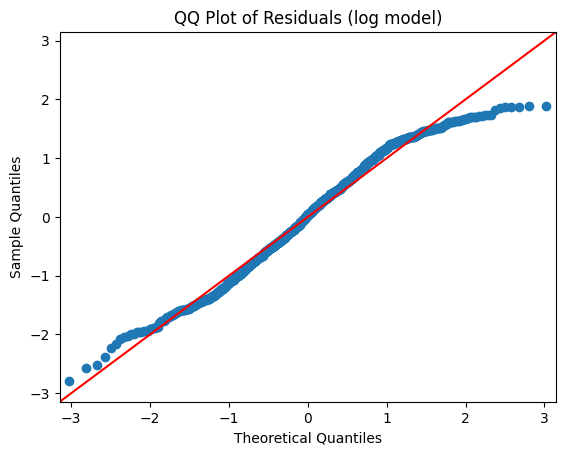

In [ ]:
sm.qqplot(residuals_train, line='45', fit=True)
plt.title("QQ Plot of Residuals (log model)")
plt.show()

In the Shapiro-Wilk test, we reject the null hypothesis, thus invalidating the normality of the errors. However, since these errors detect very small deviations, they can be overly sensitive. I'm not sure if I can rely solely on Shapiro-Wilk given the other information in my graphs.

In [ ]:
shapiro_stat, shapiro_p = shapiro(residuals_train)
print("Shapiro-Wilk statistic:", shapiro_stat)
print("Shapiro-Wilk p-value:", shapiro_p)

Shapiro-Wilk statistic: 0.9785772953051172
Shapiro-Wilk p-value: 1.9335644732482203e-09


###KEY INSIGHTS

Property type is the strongest driver of price: detached houses increase expected price by ~740k€ compared to apartments.

Square meters are a consistent value driver, adding ~12k€ per additional m².

Amenities such as gardens and garages have positive but secondary effects.

Some aesthetic features (interior style, materials) significantly affect price, highlighting the role of perceived quality.

Location-related features (views) show negative coefficients in this dataset, suggesting potential dataset bias or interaction effects.

###Conclusions and Limitations

The final log-linear model shows improved stability and generalization.

The model is suitable for price estimation within the observed data range.

Predictions should be used as decision support, not as final appraisals.

Future improvements could include interaction terms, non-linear models, or additional location-level variables.

#THANKS

Thank you for following the path this far; it has been substantial, and there are some complex concepts. Thank you very much, and until the next model.